In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
# !unzip car -d car

In [ ]:
import os
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model 
from glob import glob
os.listdir("/content/car/car image")

['train', 'test']

In [ ]:
folder = glob("/content/car/car image/train/*")
folder

['/content/car/car image/train/Audi',
 '/content/car/car image/train/Marcedez Car',
 '/content/car/car image/train/Lamborghini',
 '/content/car/car image/train/Ferrari',
 '/content/car/car image/train/Tesla Car']

In [ ]:
IMG_SIZE = 224
train_path = "/content/car/car image/train"
test_path = "/content/car/car image/test"

In [ ]:
resnet = VGG19(input_shape=[IMG_SIZE, IMG_SIZE, 3], weights="imagenet", include_top=False)

In [ ]:
for layer in resnet.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folder), activation="softmax")(x)
model = Model(inputs=resnet.input, outputs=prediction)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
model.compile(metrics=["accuracy"], loss="categorical_crossentropy", optimizer="adam")

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2, 
                                   horizontal_flip=True,
                                   zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                  batch_size=10, 
                                                  target_size=(224, 224),
                                                  class_mode="categorical")
test_set = test_datagen.flow_from_directory(test_path, 
                                                target_size=(224, 224),
                                                batch_size=10,
                                                class_mode="categorical")

Found 237 images belonging to 5 classes.
Found 68 images belonging to 5 classes.


In [ ]:
history = model.fit_generator(train_set, validation_data=test_set,
                              epochs=150,
                              steps_per_epoch=len(train_set),
                              validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/150
24/24 [==============================] - 4s 171ms/step - loss: 2.4449 - accuracy: 0.2869 - val_loss: 1.1369 - val_accuracy: 0.6324
Epoch 2/150
24/24 [==============================] - 3s 142ms/step - loss: 0.9144 - accuracy: 0.6329 - val_loss: 0.6829 - val_accuracy: 0.7353
Epoch 3/150
24/24 [==============================] - 3s 140ms/step - loss: 0.5314 - accuracy: 0.8270 - val_loss: 0.7037 - val_accuracy: 0.7647
Epoch 4/150
24/24 [==============================] - 3s 144ms/step - loss: 0.4573 - accuracy: 0.8312 - val_loss: 0.2988 - val_accuracy: 0.9265
Epoch 5/150
24/24 [==============================] - 3s 142ms/step - loss: 0.3877 - accuracy: 0.8481 - val_loss: 0.5426 - val_accuracy: 0.7794
Epoch 6/150
24/24 [==============================] - 3s 141ms/step - loss: 0.2476 - accuracy: 0.9030 - val_loss: 0.3039 - val_accuracy: 0.9265
Epoch 7/150
24/24 [==============================] - 3s 142ms/step

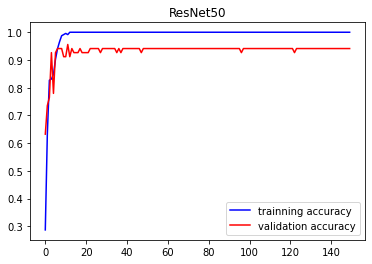

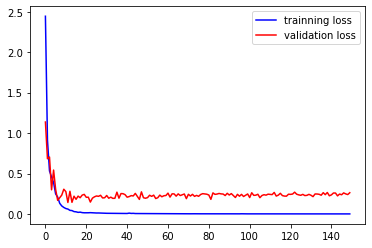

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.title("VGG19")
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(test_set)
np.argmax(y_pred, axis=1)

array([2, 1, 2, 1, 4, 2, 1, 1, 1, 4, 1, 4, 0, 4, 4, 3, 4, 2, 0, 2, 0, 0,
       1, 4, 2, 2, 3, 4, 2, 4, 0, 4, 1, 3, 2, 4, 1, 1, 3, 3, 3, 3, 2, 2,
       2, 2, 3, 4, 3, 3, 3, 4, 3, 1, 3, 0, 4, 1, 0, 3, 0, 0, 3, 3, 1, 3,
       4, 2])

In [ ]:
class_dict = train_set.class_indices
class_dict

{'Audi': 0, 'Ferrari': 1, 'Lamborghini': 2, 'Marcedez Car': 3, 'Tesla Car': 4}

In [ ]:
model.save("carss.model")

INFO:tensorflow:Assets written to: carss.model/assets


In [ ]:
import tensorflow as tf
def prepare(path):
  img_array = cv2.imread(path, cv2.IMREAD_COLOR)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  new_array = new_array / 255
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("carss.model")

In [ ]:
predict = model.predict([prepare("/content/car/car image/test/Audi/Audi10.jpg")])
if np.argmax(predict) == 0:
  print("Audi")
elif np.argmax(predict) == 1:
  print("Ferrari")
elif np.argmax(predict) == 2:
  print("Lamborghini")
elif np.argmax(predict) == 3:
  print("Mercidez")
else:
  print("Tesla")

Audi


In [ ]:
prediction = model.predict([prepare("/content/00-mercedes-benz-ag-company-2560x1440.jpeg")])
if np.argmax(prediction) == 0:
  print("Audi")
elif np.argmax(prediction) == 1:
  print("Ferrari")
elif np.argmax(prediction) == 2:
  print("Lamborghini")
elif np.argmax(prediction) == 3:
  print("Mercidez")
elif np.argmax(prediction) == 4:
  print("Tesla")

Lamborghini


In [ ]:
predict = model.predict([prepare("/content/2019-Audi-S7-TDI-sedan-White-1001x565.jpg")])
np.argmax(predict)

0